In [2]:
from google.colab import drive
import os
from fastai.vision.all import *

#drive.mount('/content/drive')

# Define specific path where data is stored
base_path = '/content/drive/MyDrive/Colab Notebooks/language-classifier/language-datasets'

# Check if folders exist and print confirmation
if os.path.exists(f'{base_path}/programming-languages') and os.path.exists(f'{base_path}/human-languages'):
  print(f"Directories exist at: {base_path}")

  # Count items in 'programming-languages' directory
  programming_count = len(os.listdir(f'{base_path}/programming-languages'))
  print(f"Number of items in 'programming-languages': {programming_count}")

  # Count items in 'human-languages' directory
  human_count = len(os.listdir(f'{base_path}/human-languages'))
  print(f"Number of items in 'human-languages': {human_count}")

else:
  print("One or more directories do not exist. Please check the paths.")

Directories exist at: /content/drive/MyDrive/Colab Notebooks/language-classifier/language-datasets
Number of items in 'programming-languages': 23
Number of items in 'human-languages': 11


In [3]:
# Simple check
human_count + programming_count

34

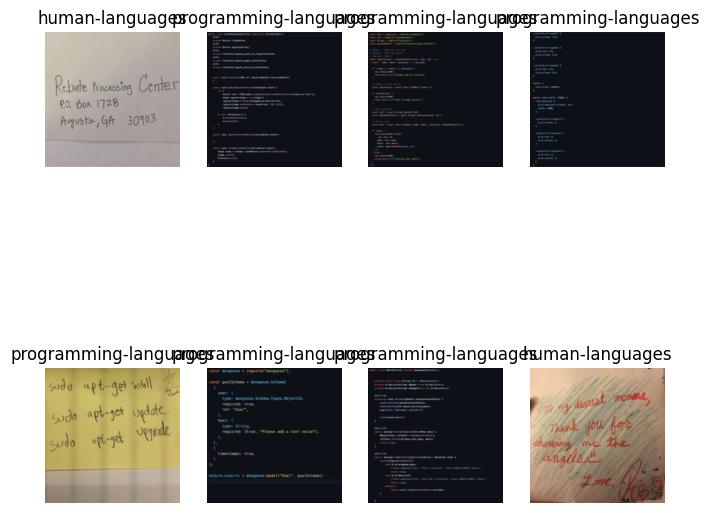

In [4]:
# Create DataLoader with automatic resiziing to 224x224 pixels
dls = ImageDataLoaders.from_folder(base_path, valid_pct=0.2, item_tfms=Resize(224), bs=8)
dls.show_batch(max_n=8, figsize=(8, 8))

In [5]:
# Train a model
learn = vision_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 121MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,1.917376,1.471092,0.142857,00:13


epoch,train_loss,valid_loss,accuracy,time
0,1.406862,1.223998,0.428571,00:09
1,1.103449,0.919901,0.714286,00:10
2,0.881839,0.757693,0.714286,00:10
3,0.820569,0.863816,0.714286,00:10


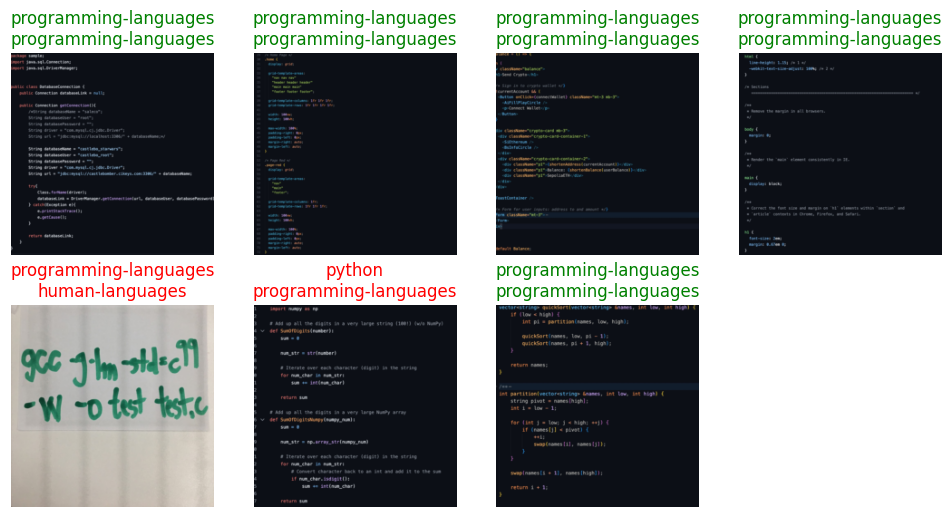

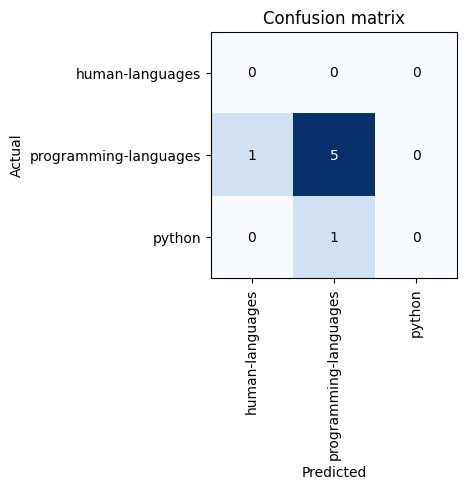

In [6]:
learn.show_results()
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

Saving HUMAN-or-programming-test-2.jpg to HUMAN-or-programming-test-2.jpg


Prediction: human-languages
Probablity: 0.8669


<Axes: >

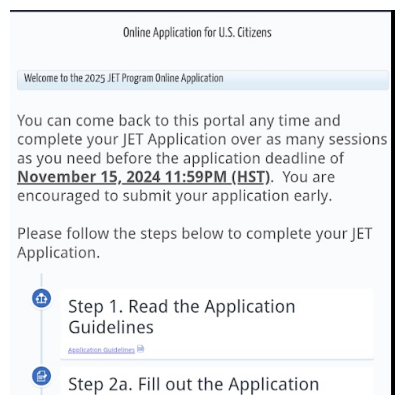

In [9]:
from google.colab import files

uploaded = files.upload() # Opens a prompt to upload an image

# Load the uploaded image
img_path = list(uploaded.keys())[0]
img = PILImage.create(img_path)

# Make a prediction with the trained model
pred, pred_idx, probs = learn.predict(img)

# Display results
print(f'Prediction: {pred}') # Predicted class
print(f'Probablity: {probs[pred_idx]:.4f}') # Confidence level

img.show()